In [1]:
#Let's flex my hands at keras. Looks fun, and tensorflow is just too much... unclean. Let's see how this works.

In [10]:
import sys
sys.path.append("C:/Program Files/NVIDIA GPU Computing Toolkit/cudnn/bin")
sys.path.append("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v9.0/bin")

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.10.0


In [4]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
fashion_dat = keras.datasets.fashion_mnist

In [6]:
fashion_dat

<module 'tensorflow.keras.datasets.fashion_mnist' from 'd:\\desk\\ml\\mlenv64\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_dat.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [11]:
X_test[0].shape

(28, 28)

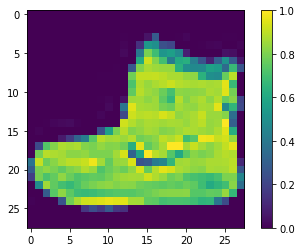

In [12]:
plt.figure()
plt.imshow(X=X_train[0]/255.0)
plt.colorbar()

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

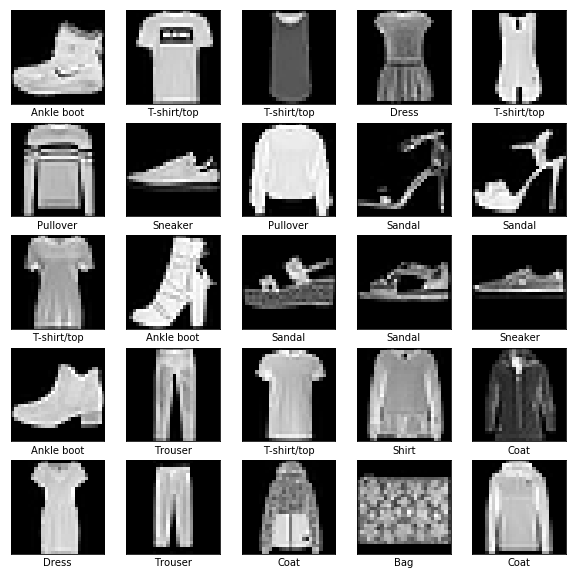

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gist_gray)
    plt.xlabel(CLASS_NAMES[y_train[i]])
    plt.xticks([])
    plt.yticks([])

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 4s 64us/step - loss: 0.4861 - acc: 0.8242
Epoch 2/25
60000/60000 [==============================] - 4s 59us/step - loss: 0.3934 - acc: 0.8559
Epoch 3/25
60000/60000 [==============================] - 4s 59us/step - loss: 0.3631 - acc: 0.8657
Epoch 4/25
60000/60000 [==============================] - 4s 59us/step - loss: 0.3463 - acc: 0.8732
Epoch 5/25
60000/60000 [==============================] - 4s 59us/step - loss: 0.3377 - acc: 0.8758
Epoch 6/25
60000/60000 [==============================] - 4s 61us/step - loss: 0.3265 - acc: 0.8805
Epoch 7/25
60000/60000 [==============================] - 4s 60us/step - loss: 0.3199 - acc: 0.8808
Epoch 8/25
60000/60000 [==============================] - 4s 61us/step - loss: 0.3106 - acc: 0.8856
Epoch 9/25
60000/60000 [==============================] - 4s 61us/step - loss: 0.3029 - acc: 0.8896
Epoch 10/25
60000/60000 [==============================] - 4s 61us/step - loss: 0.2990 - acc: 0.8894

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/step


In [19]:
print(test_loss, test_acc)

0.41047129989266395 0.87


In [20]:
predictions = model.predict(X_test)

In [21]:
predictions[0].argmax()

9

In [22]:
y_test[0]

9

In [23]:
#An important distinction right now would be to see where our model is actually going wrong.
#No of wrong predictions
ans=0
for i in range(len(y_test)):
    if predictions[i].argmax() != y_test[i]:
        ans += 1
print(ans)

1300


In [24]:
def print_wrong_outputs(predictions, true_values, sample_size):
    fig = plt.figure(figsize=(20,10))
    for i in range(sample_size):
        fig.subplot(sample)

In [25]:
def plot_figures(fig, i, prediction_array, truth_label):
    pred = prediction_array.argmax()
    axis = fig.add_subplot(5,5,1)
    axis.imshow(X_test[i], cmap=plt.cm.gist_gray)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel("Actually is:{0}".format(CLASS_NAMES[truth_label]))
    #axis.tick_params(labelcolor='white')
    axis.xaxis.label.set_color('w')
    axis = fig.add_subplot(5,5,2)
    bar = axis.bar(CLASS_NAMES, prediction_array)
    if pred == truth_label:
        bar[pred].set_color('b')
    else:
        bar[pred].set_color('r')
        bar[truth_label].set_color('b')
    axis.set_xlabel("Identified as:{0}".format(CLASS_NAMES[pred]))
    axis.tick_params(labelcolor='white', labelrotation=90)
    axis.xaxis.label.set_color('w')

In [26]:
def plot_image(axis, i, prediction_array, truth_label):
    pred = prediction_array.argmax()
    axis.imshow(X_test[i], cmap=plt.cm.gist_gray)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel("Actually is:{0}".format(CLASS_NAMES[truth_label]))
    #axis.tick_params(labelcolor='white')
    axis.xaxis.label.set_color('w')

In [27]:
def plot_bar(axis, prediction_array, truth_label):
    pred = prediction_array.argmax()
    bar = axis.bar(CLASS_NAMES, prediction_array)
    if pred == truth_label:
        bar[pred].set_color('b')
    else:
        bar[pred].set_color('r')
        bar[truth_label].set_color('b')
    axis.set_xlabel("Identified as:{0}".format(CLASS_NAMES[pred]))
    axis.tick_params(labelcolor='white', labelrotation=90, labelsize=2)
    axis.xaxis.label.set_color('w')

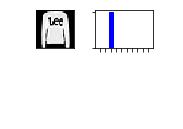

In [28]:
fig = plt.figure()
plot_figures(fig, 1, predictions[1], y_test[1])

In [29]:
import random
def show_samples(sample_size):
    random.seed(None)
    fig = plt.figure(figsize=(10,20))
    for i in range(1,2*sample_size,2):
        axes = plt.subplot(4,4,i)
        rand = random.randint(0, len(X_test))
        plot_image(axes, rand, predictions[rand], y_test[rand])
        axes = plt.subplot(4,4,i+1)
        plot_bar(axes, predictions[rand], y_test[rand])

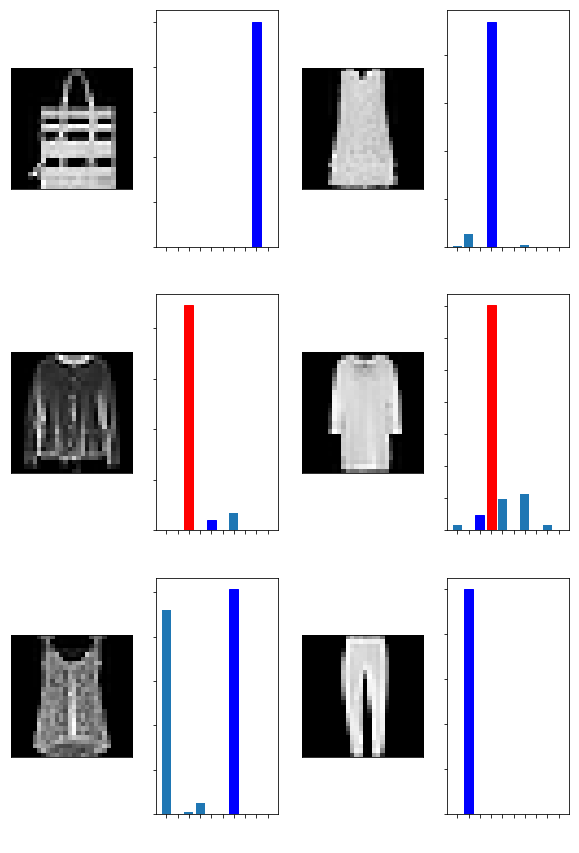

In [30]:
show_samples(6)

In [31]:
#Let's see how it works on a new image
#The following image is a random Tshirt image from Amazon, compressed to 28*28 pixels.

In [32]:
from PIL import Image

In [33]:
import matplotlib.image as mpimg

In [34]:
img = mpimg.imread('./test.jpg')
print(type(img))

<class 'numpy.ndarray'>


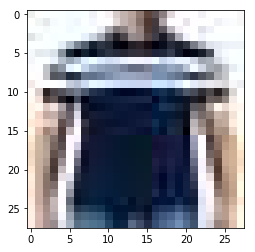

In [35]:
plt.imshow(img)

In [36]:
img[0][0]


array([239, 241, 238], dtype=uint8)

In [37]:
def rgb2gray(rgb):
    return np.dot(rgb[0:,0:,:3], [0.299, 0.587, 0.114]) #Can replace 0:,0: by Ellipsis(...) operator

In [38]:
test_image = rgb2gray(img) / 255.0

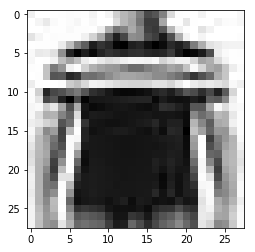

In [39]:
plt.imshow(test_image, cmap=plt.cm.gist_gray)

In [40]:
test_image.shape

(28, 28)

In [41]:
test_image = (np.expand_dims(test_image,0))

print(test_image.shape)

(1, 28, 28)


In [42]:
pred = model.predict(test_image)[0]

In [43]:
pred

array([9.1000083e-14, 1.0000000e+00, 1.6912414e-23, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.5860800e-30, 0.0000000e+00,
       1.2479153e-21, 0.0000000e+00], dtype=float32)

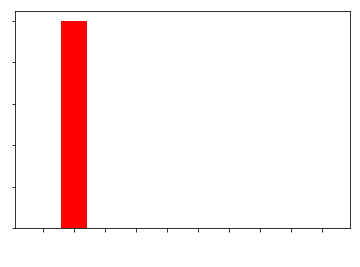

In [44]:
fig = plt.figure()
ax = fig.gca()
plot_bar(ax, prediction_array=pred, truth_label=0)

In [45]:
#That bad on random data?

(1, 28, 28)


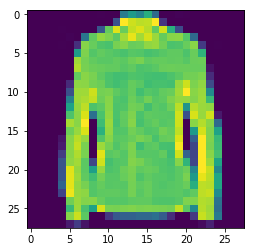

In [46]:
test_image = (np.expand_dims(X_test[26],0))
plt.imshow(X_test[26])
print(test_image.shape)

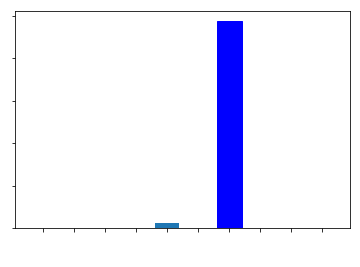

In [47]:
pred = model.predict(test_image)[0]
fig = plt.figure()
ax = fig.gca()
plot_bar(ax, prediction_array=pred, truth_label=y_test[26])